# Deployment Stage: Deploy model on a SageMaker Endpoint and Visualize the Predictions

## Get the model artifact (S3 output path) of your sagemaker training job => Output Section
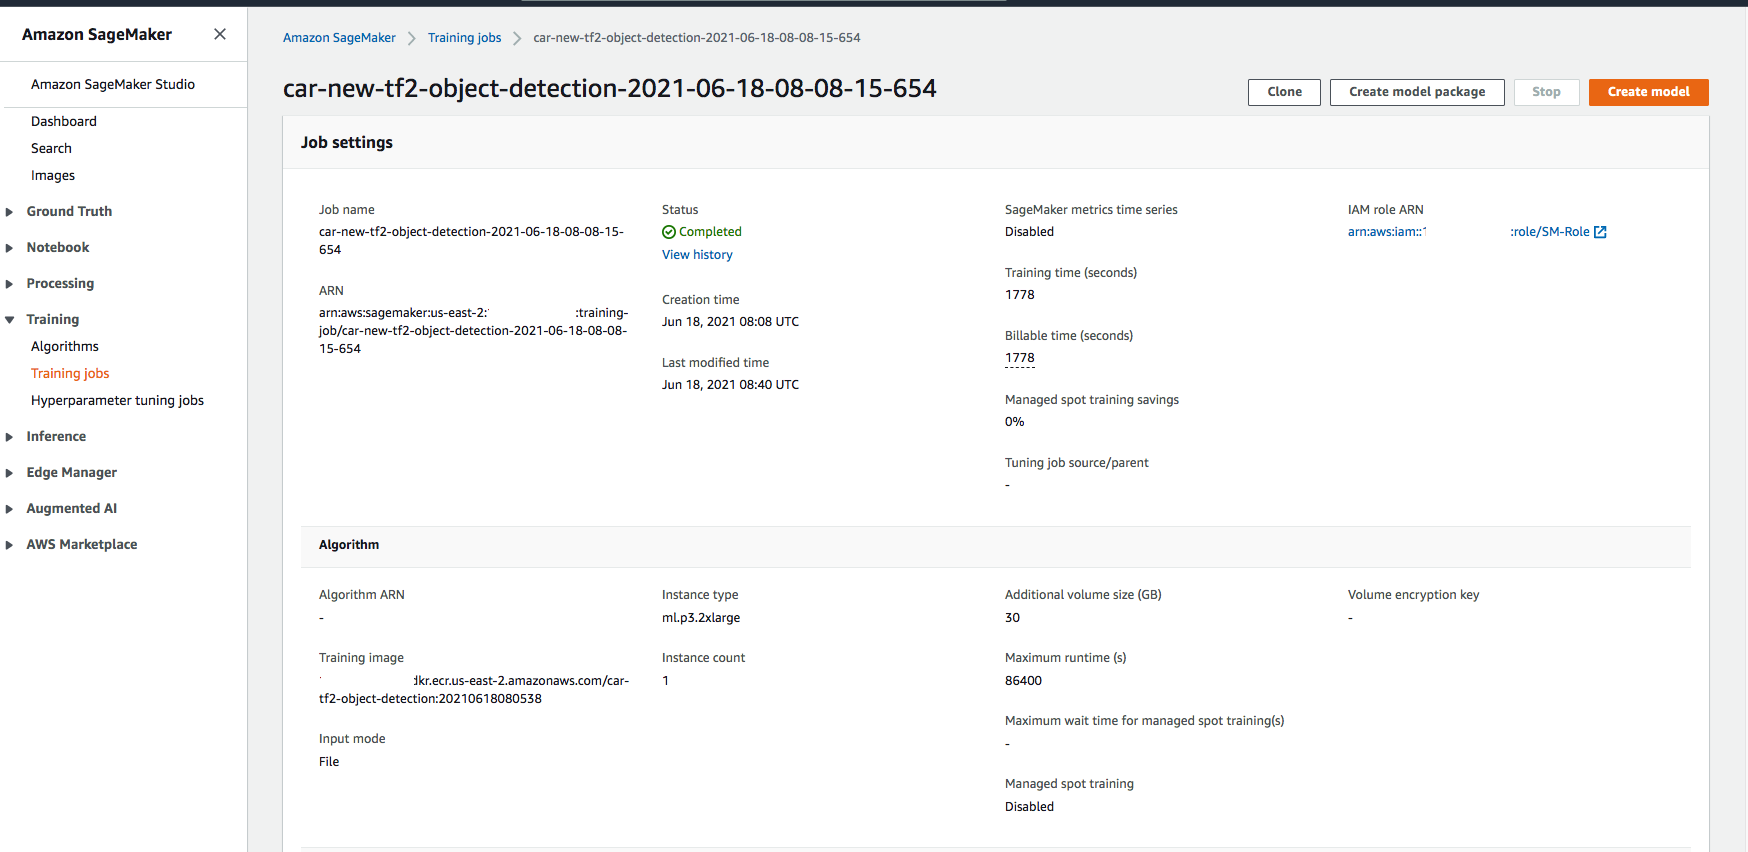
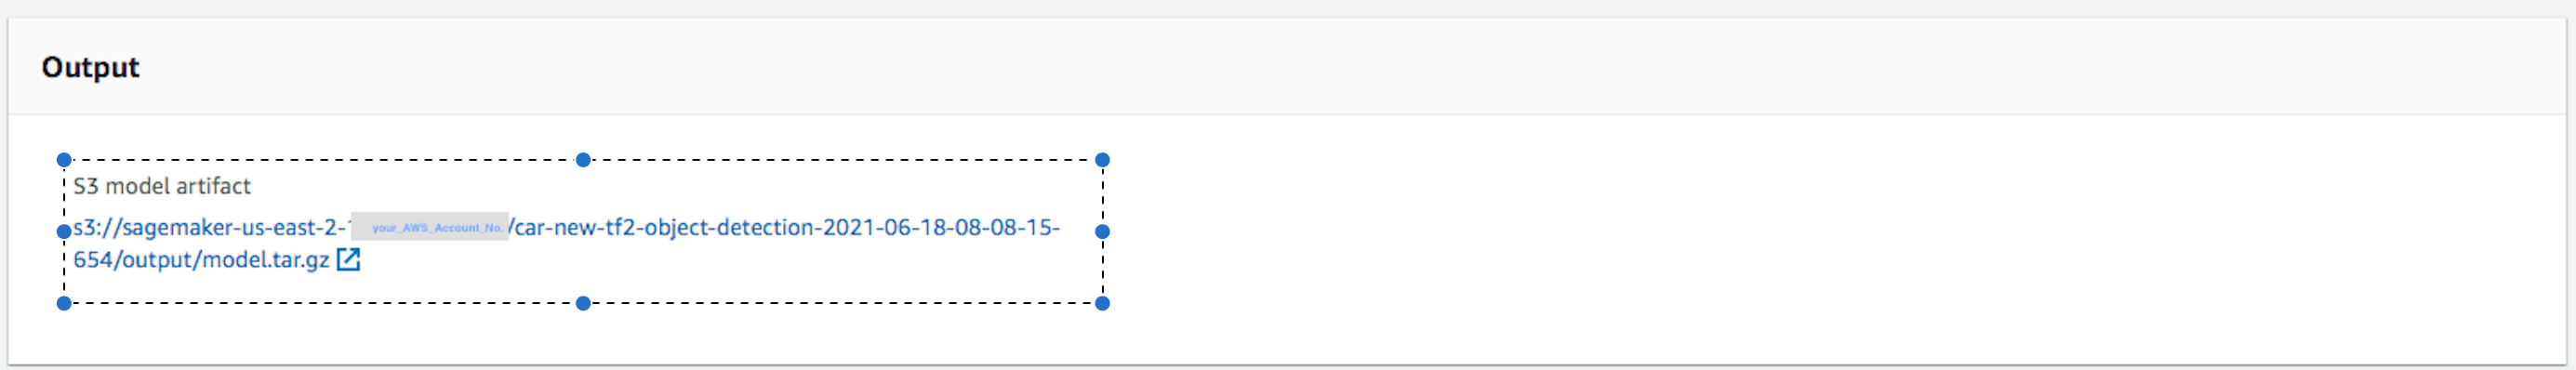

## Setup environment

In [ ]:
import cv2
import sagemaker
import numpy as np
import matplotlib.pyplot as plt
from sagemaker import get_execution_role
from sagemaker.utils import name_from_base
from sagemaker.tensorflow import TensorFlowModel
import visualization_utils as viz_utils

role = sagemaker.get_execution_role()
model_artefact = 's3://sagemaker-<<your_region>>-<<AWS_Account_Number>>/<<Training_Job_Name>>/output/model.tar.gz'
# For Model Artifact S3 path refer to your sagemaker training job as shown above.

## Create endpoint

In [ ]:
model = TensorFlowModel(
    name=name_from_base('car70-new-tf2-object-detection-1'),
    model_data=model_artefact,
    role=role,
    framework_version='2.2'
)

In [ ]:
predictor = model.deploy(initial_instance_count=1, instance_type='ml.m5.xlarge')

## Predict

#### Please complete below steps before prediction.
1. Download the test images from kaggle.com => https://www.kaggle.com/asharma237/test-car-images-scratch-dent
2. Create "test_images" directory & upload the test images in your notebook => "/3_predict/test_images/"

In [ ]:
def image_file_to_tensor(path):
    cv_img = cv2.imread(path,1).astype('uint8')
    cv_img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    return cv_img

In [ ]:
img = image_file_to_tensor('test_images/test-1.jpg') #To test the predictions, please use test images from kaggle.com as instructed above.

input = {
  'instances': [img.tolist()]
}

detections = predictor.predict(input)['predictions'][0]

img_with_detections = img.copy()
category_index = {1:{'id': 1, 'name': 'dent'}, 2:{'id': 2, 'name': 'scratch'}}
#object_categories = ['0', '1']
detection_boxes = np.array(detections['detection_boxes'])
detection_classes = [int(x) for x in detections['detection_classes']]
detection_scores = detections['detection_scores']

In [ ]:
%matplotlib inline

viz_utils.visualize_boxes_and_labels_on_image_array(
    img_with_detections,
    detection_boxes,
    detection_classes,
    detection_scores,
    category_index,
    use_normalized_coordinates=True,
    max_boxes_to_draw=5,
    min_score_thresh=0.60,
    agnostic_mode=False)

plt.figure(figsize=(10,10))
plt.imshow(img_with_detections)
plt.show()

## Delete endpoint

In [ ]:
sagemaker.Session().delete_endpoint(predictor.endpoint)